# Titanic Data Analysis

Authors: $\lambda$ Justin Ventura & Blaine Mason $\lambda$

Date: Tuesday, December 1st, 2020.

## - Description -

In this notebook, we will use various machine learning techniques in order to create a model that can predict whether a given individual on the Titanic had survived, given their 'features.'  We will show the effectiveness and learning curves of each algorithm, as well as analyze why or why not the algorithm is performing as intended.

**Below we will need to import these libraries:**

In [2]:
""" Basic Data-Science / Machine Learning Libraries: """
import re  # This is for regex filters.
import importlib  # For module loading.
import numpy as np  # Typical numpy as np.
import pandas as pd  # Dataframes library.
import seaborn as sn  # Another usefull lib.
import numpy.linalg as la  # Linear Alg np.
import visualizations as vis  # Visual help.
import matplotlib.pyplot as plt  # Plotting.
from scipy import stats  # For simple stats.
from timeit import default_timer as timer # start = timer(), end = timer()

""" K-Nearest Neighbors Model Imports """
from KNN_Model import knn_vector, kNN_Model
kvect, kmodel = knn_vector, kNN_Model

""" Import tools for Data Management """
import data_management as manager # Just import them all.
importlib.reload(manager)

""" Import and clean the Titanic Dataset """
titanic = pd.read_csv('titanic_data.csv')  # Reads data nicely.
titanic.replace({'age': {'?': np.nan}}, regex=False, inplace=True)
titanic.replace({'fare': {'?': np.nan}}, regex=False, inplace=True)
titanic[['age', 'fare']] = titanic[['age', 'fare']].astype(float)

## Explanation of the data being analyzed.


The data at hand is real data collected from the Titanic (April 14-15, 1912).  Each row is a specific person who was present at the time of the ships departure.  The columns represent the 'features' of each individual such as: their name,sex, age, fare paid, ticket number, and a few others.  The most important one which we will designate as the 'class' or 'label' of every row or 'population' will be the 'survived' column (feature).

### Designating a Label.

The purpose of a 'label' or 'class' is to be able to look at the data, and find specific sub-populations that may be related through some sort of metric to define such a relationship.  In this case, the most obvious and interesting feature to be considered the label of each person is: whether or not they survived the tragic sinking of the Titanic in 1912.  This clearly gives two groups: survivors (numeric label: 1) and non-survivors (0).  Given such labels, we can then take their features and possibly find out if any given value(s) for a feature, pair of features, or any combination of certain features, could have influenced their likelihood of survival.

### Why?

There are many questions to be asked, and (almost) just as many answers to be returned.  A question one may have is: 'what does this matter?  The Titanic has already sank!'  This is true; however, some findings can be interesting to those who may be concerned as to their own likelihood of surviving a ship-wreck if they are met with these unfortunate cirumstances.  It is also interesting to see which people tended to survive, and possibly come to 'conclusions' as to why they may have been more or less likely to survive.  I use the word 'conclusion' loosely, as the #1 rule to any data analysis is: * CORRELATION DOES NOT EQUAL CAUSATION. *

### Hypothesizing Possible Correlations:

We can of course make some guesses about certain types of persons rate of survival, or make the hypthothesis: 'perhaps female passengers were most likely to survive, since they may have prioritized women and children over the men when loading the escape boats.'  There are likely some things to keep in mind; the data only separates by gender, and has no 'child' attribute, so we cannot simply do a female to male comparison.  If we consider the hypothesis, order to keep the results reliable, we will also need to filter the ages, and put those under the age of say, 18, in the same category as the women, regardless of gender.

### Correlation between Sex and Survival.

Before we check the actual rates, lets see if we can find a correlation between gender and chances of survival.  This will not take into account the 'women and children first' hypothesis, but just simply between the two genders.  We will use a heatmap on the correlation matrix between the sex and survived features.  Note that a correlation value of 1 means a perfect correlation (A goes up at rate R, B also goes up R), 0 means no correlation, and -1 means a perfect inverse correlation (A goes up at rate R, B goes down at rate R).

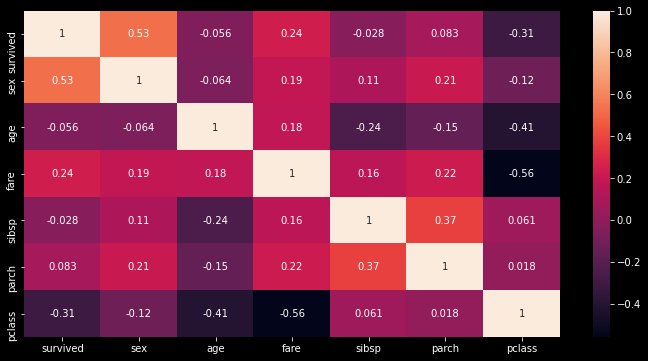

In [47]:
# Creating a subframe that shows correlations:
sex_survival = titanic[['survived', 'sex', 'age', 'fare', 'sibsp', 'parch', 'pclass']]
genders = {'male': 0, 'female': 1}
sex_survival['sex'] = sex_survival['sex'].map(genders)

# Use seaborn for the heatmap then plot it:
sn.heatmap(sex_survival.corr(), annot=True)
plt.show()

### Found a Correlation!

Notice that sex and survived columns have a strong positive correlation slightly above 0.5, which indicates that as survived goes up (up to 1 means they survived), sex goes up with it (1 is for females).  This is a reasonable correlation for us to go on with testing the hypothesis.

** Now lets put that hypothesis to the test:**

Adult Men survival rate: 0.18055555555555555%
All Others survival rate: 0.6872340425531915%


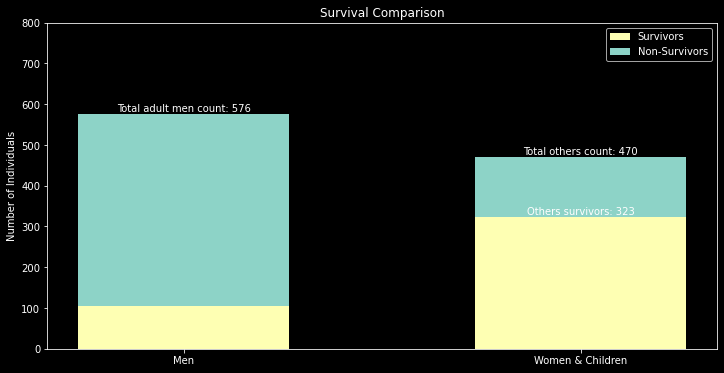

In [48]:
""" Load all the data and clean it. """
loading_boats = titanic[['survived', 'sex', 'age']]  # Sub dataset.
loading_boats = loading_boats[(loading_boats != '?').all(axis=1)]  # Clean out useless rows.
loading_boats['age'] = loading_boats['age'].astype(float)  # Make sure the ages are not str.

# Men 18+ division.
men_division = loading_boats[(loading_boats['sex'] == 'male') & (loading_boats['age'] >= 18)]
men_survive = men_division.drop(['sex'], axis=1).groupby('survived').count()

# All others.
others_division = loading_boats[(loading_boats['sex'] == 'female') | (loading_boats['age'] < 18)]
others_survive = others_division.drop(['sex'], axis=1).groupby('survived').count()

""" Visualize the data now. """
groups = (0, 0.75)  # The data has two groups: survivors, non survivors.
total_men = int(men_survive.sum())
total_other = int(others_survive.sum())
men_survived = int(men_survive[['age']].to_numpy()[1])
others_survived = int(others_survive[['age']].to_numpy()[1])
width = 0.40

# Plot the results:
totals_plot = plt.bar(groups, (total_men, total_other), width)
survivor_plot = plt.bar(groups, (men_survived, others_survived), width)

# Numerate the total count for men.
plt.annotate(
            f'Total adult men count: {total_men}',
            (0, total_men),
            xytext=(0, 1),
            textcoords="offset points",
            ha='center',
            va='bottom')

Numerate the survivor count for men.
plt.annotate(
            f'Adult men survivors: {men_survived}',
            (0, men_survived),
            xytext=(0, 1),
            textcoords="offset points",
            ha='center',
            va='bottom')

# Numerate the total count for all others.
plt.annotate(
            f'Total others count: {total_other}',
            (0.75, total_other),
            xytext=(0, 1),
            textcoords="offset points",
            ha='center',
            va='bottom')

#Numerate the survivor count for all others.
plt.annotate(
            f'Others survivors: {others_survived}',
            (0.75, others_survived),
            xytext=(0, 1),
            textcoords="offset points",
            ha='center',
            va='bottom')

# Decorate the graph.
plt.rcParams['figure.figsize'] = [12, 6]
plt.ylabel('Number of Individuals')
plt.title('Survival Comparison')
plt.xticks(groups, ('Men', 'Women & Children'))
plt.yticks(np.arange(0, 855, 100))
plt.legend((survivor_plot[0], totals_plot[0]), ('Survivors', 'Non-Survivors'))

# Log details:
print(f'Adult Men survival rate: {men_survived/total_men}%')
print(f'All Others survival rate: {others_survived/total_other}%')
pass

### Drawing a Conclusion.

Based on the evidence we have, we know there is a correlation between ones gender, and surviving the shipwreck.  We can also make a few claims as to what my have possibly *caused* the observations.  We hypothesized that perhaps the reason that men, specifically those men 18 and older, were less likely to survive due to the typical 'save the women and children first' rule.  We could also make another claim that perhaps the crew who worked on the boat (realistically most were probably men over 18) prioritized saving others over the crew.  Both of these are decent and probable claims that have some evidence to back them up, but at the end of the day we can never be 100% sure.

## Can We Predict the 'Most Likely' Person to Survive?

We can attempt to answer this question with machine learning!  With these algorithms, cleaning and modification done to the datasets, and partitioning the data into train/test groups, we can use *supervised learning* in order to predict whether or not a person would survive the sinking of the titanic.  The first approach we will utilize is the *K-Nearest Neighbors* classification algorithm.

### K-Nearest Neighbors:

This algorithm uses the idea of creating a metric of 'distance' between rows of data.  In 1 - 3 dimensions this is trivial to visualize and comprehend.  You could imagine a number-line, euclidean coordinate plane, or a 3-dimensional space (much like our real world).  The rows/persons in question can be points in each of those 'worlds,' and the distance between those points would be defined as follows:

$$dist_1(p_1, p_2) = |p_1 - p_2| \ni p_1, p_2 \in \mathbb{R}$$
$$dist_2(p_1, p_2) = \sqrt{(p_{1x} - p_{2x})^2 + (p_{1y} - p_{2y})^2} \ni p_1, p_2 \in \mathbb{R^2}$$
$$dist_3(p_1, p_2) = \sqrt{(p_{1x} - p_{2x})^2 + (p_{1y} - p_{2y})^2 + (p_{1z} - p_{2z})^2} \ni p_1, p_2 \in \mathbb{R^3}$$

Notice the pattern, this means we can generalize the distance between points in $n$ dimensions, even if we cannot visualize it:

$$dist_n(p_1, p_2) = \sqrt{(p_{1x_1} - p_{2x_1})^2 + (p_{1x_2} - p_{2x_2})^2 + ... + (p_{1x_n} - p_{2x_n})^2} \ni p_1, p_2 \in \mathbb{R^n}$$

This is useful to know for furthering the discussion of K-Nearest Neighbors (KNN).  

### How does it work?

The idea behind KNN is to take a set of $n$ pre-labelled r-dimensional 'training points,' storing them in a data structure, typically a list/np.array (kd-trees are much more efficient, but that is beyond the scope of the discussion).  Then if we want to predict whether or not an *un-labelled* point is of a specific label, we compute the distance from that point from all points stored in the data structure (linear array, $O(n^2)$; kd-tree, $O(nlogn)$).  Then once we have those distances formulated, we need a k to choose 'votes' from all the training points.  For example, if we take $k=3$, then from the query point, we look at the 3 closest training points' labels; majority label count wins.  This can obviously lead to ties, which is up to the programmer to decide how to settle/avoid them.  An odd $k$ is ideal since this removes the even number problem of any multiple of 2 likely resulting in a tie.

### In practice:

Below we will run multiple runs of this algorithm on the Titanic Dataset to see how accurate our KNN model is.  I have found that $k=3$ has yielded the best results.  Below is learning progression of the KNN Model where we consider the progression to be the rising ratio of train:test data where train and test points are uniformly randomly partitioned.  To date, best performance I have experienced is 82.44% accuracy with an 90:10 ratio.  This does, however, warrant the suspicion of possibly overfitting.

In [3]:
# [x] TODO: use kNN to predict the 

""" 
Here we will convert the vectors to training data, then make
two sets: training and testing sets.  We will iterate through
various train:test ratios.
"""
# List of p's for ratios (train = n*p, test = n*(p-1))
# It will be a dictionary with key=p, val=result precision.
ratios = (0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90)
scores = []
length = titanic.shape[0]  # Number of rows.

# Prepare the vectors:
titanic_vectors = manager.titanic_to_vector(titanic)
np.random.shuffle(titanic_vectors)

# Iterate ovet the ratios:
for r in ratios:
    print(f'---------------- p={r} ----------------')

    # Train test partition.
    train, test = manager.partition(n=length, p=r, vectors=titanic_vectors)

    # Dubbing the KNN Model as 'Lambda.'
    Lambda = kmodel(train_vect=train, k=7)

    # Make predictions:
    scores.append(manager.titanic_predictions(model=Lambda, test_vects=test, verbose=True))
    del Lambda

print('---------------------------------')

---------------- p=0.3 ----------------
[!] -> Logging K-Nearest Neighbors Predictions.
[!] -> 917 rows may take a few moments...

 λ Confusion Matrix λ
--------------------
n=917 expected
         S   NS
model S  234 86 -> 320
guess NS 110 487 -> 597
          v   v
        344 573
--------------------
STATS: 
Numerical Error: 196
Precision: 78.62595419847328%

[!] -> End Logging K-Nearest Neighbors Predictions.
---------------- p=0.4 ----------------
[!] -> Logging K-Nearest Neighbors Predictions.
[!] -> 786 rows may take a few moments...

 λ Confusion Matrix λ
--------------------
n=786 expected
         S   NS
model S  198 68 -> 266
guess NS 96 424 -> 520
          v   v
        294 492
--------------------
STATS: 
Numerical Error: 164
Precision: 79.13486005089058%

[!] -> End Logging K-Nearest Neighbors Predictions.
---------------- p=0.5 ----------------
[!] -> Logging K-Nearest Neighbors Predictions.
[!] -> 655 rows may take a few moments...

 λ Confusion Matrix λ
--------------

### Results:

These are the recorded results in the form of a learning curve I have found based on my trials.  The y-axis is the correct percentage vs the training data.  The x-axis is the percentage of the original data that was used as training.  Clearly you can see that the larger training sets performed best (any exceptions are demonstrations of bias).  At the time I am running these cells, the 90% hit a solid 82.44% prediction rate.  Based on some research I had done, the average Kaggle score for a very similar instance of this problem was around 75%, and 85-90% for a neural network.

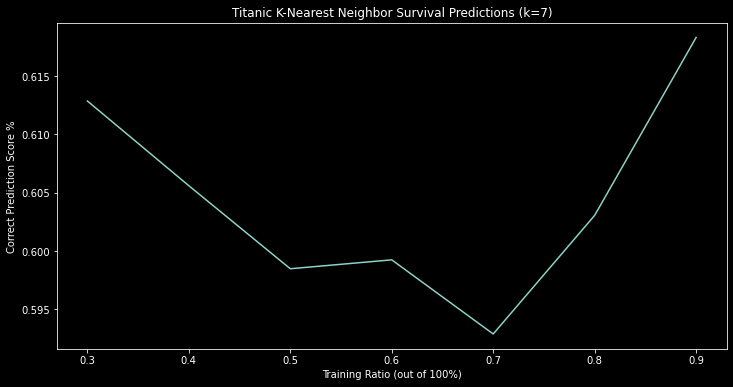

In [73]:
# Plot the data collected from the previous cell.
plt.plot(ratios, [s/100 for s in scores])
plt.title('Titanic K-Nearest Neighbor Survival Predictions (k=7)')
plt.ylabel('Correct Prediction Score %')
plt.xlabel('Training Ratio (out of 100%)')
plt.show()
pass

### Can We Do Better?

K-Nearest Neighbors is a great and easy-to-understand classification algorithm, but it is very simple and naive.  We were able to come up with a solid 82.44% prediction score, but lets see if we can come up with another, possibly better, algorithm.  We will move out of the realm of simplicity, and move into a more complex one: neural networks.

## Neural Network for Titanic Survival Predictions:

The next algorithm we will use to predict a survivor based on their features is a neural network.  As you can see below, the network took very long to train and we were able to get it to 72%.  The visualizations were unfortunately very difficult to come up with.

In [16]:
# [x] TODO: Make a Neural Network.
import NeuralNetwork as TNN
importlib.reload(TNN)
importlib.reload(manager)
Lambda = TNN.Tneural_network(8, 4, 3)

In [23]:
np.random.shuffle(titanic_vectors)
train, test = manager.partition(n=len(titanic_vectors), p=0.75, vectors=titanic_vectors)

In [26]:
Lambda.reset()
train_x = np.array([t.get_values() for t in train])
train_y = np.array([t.get_label() for t in train])
Lambda.train_network(train_x, train_y, 1)

Current loss: 239.69487052870943


In [27]:
Lambda.train_network(train_x, train_y, 10000)

Current loss: 215.822971105604


In [28]:
total = 0
counter = 0

test_x = np.array([t.get_values() for t in test])
test_y = np.array([t.get_label() for t in test])

for t in test:
    res = Lambda.titanic_network_predict(t.get_values())
    if 0 <= res < 0.5:
        if t.get_label() == 0:
            counter += 1
    else:
        if t.get_label() == 1:
            counter += 1
    total += 1

print(f'total precision: {counter/total * 100}')

total precision: 68.90243902439023


In [29]:
Lambda.train_network(train_x, train_y, 10000)

Current loss: 208.06698029800728


In [30]:
for t in test:
    res = Lambda.titanic_network_predict(t.get_values())
    if 0 <= res < 0.5:
        if t.get_label() == 0:
            counter += 1
    else:
        if t.get_label() == 1:
            counter += 1
    total += 1

print(f'total precision: {counter/total * 100}')

total precision: 71.1890243902439


In [31]:
Lambda.train_network(train_x, train_y, 15000)

Current loss: 203.45864802728184


In [32]:
for t in test:
    res = Lambda.titanic_network_predict(t.get_values())
    if 0 <= res < 0.5:
        if t.get_label() == 0:
            counter += 1
    else:
        if t.get_label() == 1:
            counter += 1
    total += 1

print(f'total precision: {counter/total * 100}')

total precision: 72.5609756097561
